# Built-in Dataset

-   파이토치는 분야별 공개 데이터셋을 종류별로 torchvision, torchtext, torchaudio 모듈을 통해 제공한다.
-   모든 built-in dataset은 [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)의 하위클래스로 구현되있다.
    -   [computer vision dataset](https://pytorch.org/vision/stable/datasets.html)
    -   [audio dataset](https://pytorch.org/audio/stable/datasets.html)

## Image Built-in dataset Loading

torchvision 모듈을 통해 다양한 오픈소스 이미지 데이터셋을 loading할 수 있는 Dataset 클래스를 제공한다.

-   각 Dataset 클래스의 주요 매개변수 (클래스들 마다 약간의 차이가 있다.)
    -   **root**: str
        -   Raw data를 저장할 디렉토리 경로
    -   **train**: bool
        -   True일경우 Train set을 False일 경우 Test set을 load
    -   **download**: bool
        -   True이면 root에 지정된 경로에 raw 데이터를 인터셋에서 download할지 여부. 이미 저장되 있는 경우 download하지 않는다.
    -   **transform**: function
        -   Loading한 이미지를 변환하는 function.
            -   Normalization이나 data Agumentation 처리를 한다.


In [17]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [18]:
mnist_data_dir = "datasets"
mnist_trainset = datasets.MNIST(
    root=mnist_data_dir, # raw data의 위치.
    download=True,       # root에 지정한 경로에 없을 경우 다운받을지 여부
    train=True,          # True: train set, False: test set
)

In [19]:
mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train

In [4]:
# Dataset의 총 데이터개수를 조회 - len()
len(mnist_trainset)

60000

In [5]:
# 개별 데이터를 조회 -> indexing
mnist_trainset[0]  # 개별데이터는 x(input)과 y(output)로 구성되어 tuple(x,  y)로 반환된다.

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
# 첫번째 데이터 조회
x0 = mnist_trainset[0]

# 첫번째 데이터 이미지 확인
x0[0]

In [7]:
# 첫번째 데이터 label 확인
x0[1]

5

In [28]:
######################################################################
# Target class 값 조회
######################################################################
# class index(id) - class name
## class index(class id): 인코딩 된 label의 클래스, 
## class name: 실제 class의 이름.
### 0-setosa 의 경우 0: class index, setosa: class name

mnist_trainset.class_to_idx
# dict: key-class name, value: class index
# class name으로 class index를 조회할 수있다.

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [29]:
mnist_trainset.classes 
# list: index-class index, value-class name
# class index로 class 이름을 조회할 수 있다.

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']


## Dataset의 transform 매개변수를 이용한 데이터 전처리

- Dataset을 생성할 때, **원본 데이터를 제공하기 전 수행할 전처리 과정**을 함수(callable) 형태로 정의한다.
- 이 함수(callable)는 **입력 데이터 하나**를 매개변수로 받아, 전처리된 결과를 반환하도록 구현한다.
- transform 매개변수에는 데이터 파이프라인을 구성하는 함수나 callable 객체를 설정한다.

### torchvision에서 제공하는 주요 transform

- `torchvision.transforms.ToTensor`
  - PIL 이미지(PIL Image)나 넘파이 배열(NumPy ndarray)을 FloatTensor(float32 Tensor)로 변환한다.
  - 이미지 픽셀의 값(intensity)을 \[0., 1.\] 범위로 비례 조정한다.
  - 이미지의 형태(shape)를 (채널, 높이, 너비) 순서로 변경한다.
  - 자세한 내용은 [torchvision transforms 공식 문서](https://pytorch.org/vision/stable/transforms.html) 참고.

- `torchvision.transforms.Normalize`
  - 각 채널별로 지정된 평균(mean)을 빼고, 표준편차(standard deviation)로 나누어 정규화(normalization)를 수행한다.
  - `ToTensor()`로 변환된 데이터를 입력받아 추가 변환을 적용한다.

- `torchvision.transforms.Compose`
  - 여러 변환을 순차적으로 적용하고 싶을 때, `Compose` 클래스를 사용해 변환들을 하나로 묶는다.

In [21]:
mnist_trainset2 = datasets.MNIST(
    root=mnist_data_dir, 
    download=True,       
    train=True,
    transform=transforms.ToTensor()  # 전처리 callable 전달.
)

In [11]:
x0_2 = mnist_trainset2[0]

In [12]:
# ToTensor()의 전처리 작업.
print(x0_2[0].type())  # PIL.Image, np.ndarray -> pytorch Tensor 로 변환
print(x0_2[0].min(), x0_2[0].max()) # 0 ~ 1 사이로 scaling. (MinMaxScaling)
print(x0_2[0].shape) # channel first 로 shape을 변경. (channel, height, width)

torch.FloatTensor
tensor(0.) tensor(1.)
torch.Size([1, 28, 28])


In [24]:
# ToTensor() -> Normalize()
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean=0.5, std=0.5)  # 모든 채널에 동일한 값을 적용: 상수., 채널별로 다른 값 적용: 리스트.
])

mnist_trainset3 = datasets.MNIST(
    root=mnist_data_dir, 
    download=True,       
    train=True,
    transform=transform
)

In [25]:
x_3 = mnist_trainset3

In [16]:
x_3

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

### TODO: CIFAR10 Dataset loading
- `datasets.CIFAR10` 이용
-   CIFAR10 Built-in dataset 을 LOADING 후 다음을 확인하시오.
    1. Dataset loading
    1. train dataset, test dataset의 데이터 개수 확인
    1. class index - class name 확인
    1. train set의 이미지 5장을 출력. label의 이름을 title로 출력.


In [4]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean=0.5, std=0.5)  # 모든 채널에 동일한 값을 적용: 상수., 채널별로 다른 값 적용: 리스트.
])

In [6]:
mnist_data_dir = "datasets"
cft_trainset = datasets.CIFAR10(
    root=mnist_data_dir, # raw data의 위치.
    download=True,       # root에 지정한 경로에 없을 경우 다운받을지 여부
    train=True          # True: train set, False: test set
)

In [7]:
cft_test = datasets.CIFAR10(
    root=mnist_data_dir,      
    train=False#
)

In [8]:
cft_trainset , cft_test

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: datasets
     Split: Train,
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: datasets
     Split: Test)

In [9]:
print(cft_trainset.class_to_idx)
print(cft_test.class_to_idx)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


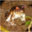

In [11]:
cft_trainset[0][0]

6 frog


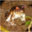

9 truck


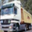

9 truck


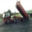

4 deer


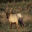

1 automobile


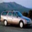

In [15]:
from IPython.display import display
for i in range(5):
    print(cft_trainset[i][1],cft_test.classes[cft_trainset[i][1]])
    display(cft_trainset[i][0])

## DataLoader 생성

-   DataLoader
    -   모델이 학습하거나 추론할 때 Dataset의 데이터를 batch size 개수단위로 모아서 모델에 제공한다.
    -   initalizer속성
        -   dataset: 값을 제공하는 Dataset 타입 객체
        -   batch_size: 한번에 값을 제공할 batch 크기
        -   shuffle: 에폭마다 데이터셋을 섞을 지 여부 (default: False)
        -   drop_last: 마지막 배치의 데이터개수가 batch_size 설정보다 적을 경우 제공할 지 여부(False-기본값, 제공한다. True: 제공하지 않는다.)


In [26]:
from torch.utils.data import DataLoader

mnist_train_loader = DataLoader(mnist_trainset2, batch_size=860, shuffle=True, drop_last=True)

In [27]:
# step 수 조회
len(mnist_train_loader)

69

# Custom Dataset 구현

사용자가 보유한 데이터를 이용하여 커스텀 Dataset을 생성할 수 있다.

## 구현 방법
1. `torch.utils.data.Dataset` 클래스를 상속하는 새로운 클래스를 정의한다.

2. `__init__(self, ...)`
   - Dataset 객체 생성 시 필요한 설정을 초기화한다.
   - 예를 들어, 데이터 저장 경로, transform 설정 여부 등을 초기화한다.

3. `__len__(self)`
   - 전체 데이터의 개수를 반환하도록 구현한다.
   - DataLoader가 배치를 생성할 때 이 정보를 사용한다.

4. `__getitem__(self, index)`
   - index에 해당하는 데이터 포인트를 반환한다.
   - 입력(input, X)과 출력(output, y)을 튜플 형태로 반환한다.
   - transform이 설정되어 있을 경우, 변환된 입력 데이터를 반환한다.


In [28]:
import torch

class MyDataSet:
    def __init__(self):
        self.x_data = torch.FloatTensor([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
        self.y_data = torch.FloatTensor([[2], [4], [6], [8], [10]])
        self.len = self.x_data.shape[0]
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len
    

my_dataset = MyDataSet()
len(my_dataset)  # 데이터셋의 총 데이터 개수 조회

5

In [29]:
my_dataset[0]

(tensor([1., 1.]), tensor([2.]))

In [30]:
class MyDataset2:

    def __init__(self, x, y):
        self.x_data = x
        self.y_data = y
        self.len = self.x_data.shape[0]

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [31]:
X = torch.FloatTensor([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
y = torch.FloatTensor([[2], [4], [6], [8], [10]])

my_dataset2 = MyDataset2(X, y)
print(len(my_dataset2))

5


In [32]:
my_dataset2[0]

(tensor([1., 1.]), tensor([2.]))

In [33]:
# DataLoader 생성
from torch.utils.data import DataLoader

dataloader = DataLoader(my_dataset2, batch_size=2, shuffle=True, drop_last=True)

for data in dataloader:
    print(data)

[tensor([[1., 1.],
        [3., 3.]]), tensor([[2.],
        [6.]])]
[tensor([[5., 5.],
        [2., 2.]]), tensor([[10.],
        [ 4.]])]


# 메모리상의 Tensor, ndarray 타입의 데이터를 이용해 Dataset생성
이미 loading된 데이터셋을 Dataset으로 생성
-   torch.utils.data.TensorDataset 이용
-   parameter
    -   input: Tensor
    -   output: Tensor


In [35]:
import pandas as pd
iris = pd.read_csv("data/iris.data", 
                   header=None, 
                   names=["sepal length", "sepal width", "petal lenth", "petal width", "label"])
iris.shape

(150, 5)

In [36]:
iris.head()

,sepal length,sepal width,petal lenth,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
X = iris.drop(columns='label').values
y = iris['label'].values

In [38]:
# y값을 label encoding
from sklearn.preprocessing import LabelEncoder
y_le = LabelEncoder()
y = y_le.fit_transform(y)
y[:5]

array([0, 0, 0, 0, 0])

In [39]:
# train/test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [40]:
from torch.utils.data import TensorDataset
# (X, y) : X/y는 Tensor 타입
trainset = TensorDataset(
    torch.tensor(X_train), # input
    torch.tensor(y_train), # output
)
testset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))

In [41]:
trainset[0]

(tensor([4.8000, 3.0000, 1.4000, 0.3000], dtype=torch.float64), tensor(0))

In [42]:
y_le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# 모델 성능 평가를 위한 데이터셋 분리

-   **Train 데이터셋 (훈련/학습 데이터셋)**
    -   모델을 학습시킬 때 사용할 데이터셋.
-   **Validation 데이터셋 (검증 데이터셋)**
    -   모델의 성능 중간 검증을 위한 데이터셋
-   **Test 데이터셋 (평가 데이터셋)**
    -   모델의 성능을 최종적으로 측정하기 위한 데이터셋
    -   **Test 데이터셋은 마지막에 모델의 성능을 측정하는 용도로 한번만 사용한다.**

## 검증(validation), 평가(test) 데이터셋을 나누는 이유

-   모델을 훈련하고 성능 검증했을 때 원하는 성능이 나오지 않으면 모델의 여러 설정(하이퍼파라미터)들을 수정한 뒤에 다시 훈련시키고 검증을 하게 된다. 그리고 원하는 성능이 나올때 까지 설정변경->훈련->검증을 반복하게 된다. 이 작업이 **모델링(Modeling)** 이다.
-   위 사이클을 반복하게 되면 검증 결과를 바탕으로 설정을 변경하게 되므로 검증 할 때 사용한 데이터셋(Test set)에 모델이 맞춰서 훈련하는 것과 동일한 효과를 내게 된다.(설정을 변경하는 이유가 Test set에 대한 결과를 좋게 만들기 위해 변경하므로) 그래서 Train dataset과 Test dataset 두 개의 데이터셋만 사용하게 되면 **모델의 성능을 제대로 평가할 수 없게 된다.** 그래서 데이터셋을 train set, validation set, test set으로 나눠 train set 와 validation set을 사용해 훈련과 검증을 해 모델을 최적화 한 뒤 마지막에 test set으로 최종 평가를 한다.

> -   **(Parameter)머신러닝 모델 파라미터**
>     -   성능에 영향을 주는 값으로 최적화의야 하는 대상내는 값을 찾아야 한다.
>         -   **하이퍼파라미터(Hyper Parameter)**
>             -   사람이 직접 설정해야하는 파라미터 값으로 주로 어떻게 모델을 학습시킬지에 대한 모델설정 값이다.
>             -   딥러닝에서는 학습률, Epoch수, batch size, optimizer, loss 함수 등 다양한 하이퍼파라미터가 있다.
>         -   **파라미터(Parameter)**
>             -   모델의 함수를 데이터에 맞추기 위한 값으로 학습을 통해 찾는 변수.
>             -   딥러닝 모델에서는 weight와 bias 가 파라미터다.


## Dataset 분리

### torch.utils.data.Subset을 이용

-   Dataset의 일부를 가지는 부분집합 데이터셋을 생성
-   주로 사용하는 곳
    1. 데이터 셋을 분리
    2. 전체 데이터 셋에서 일부 데이터를 추출 할 때
    3. 데이터셋에서 특정 데이터만 골라서 추출할 때 (ex: 특정 class만 추출하는 경우)


In [43]:
import torch
from torch.utils.data import TensorDataset, Subset

In [44]:
inputs = torch.arange(1, 11).reshape(5, 2)
outputs = torch.arange(5).reshape(5, 1)
inputs.shape, outputs.shape

(torch.Size([5, 2]), torch.Size([5, 1]))

In [45]:
dataset = TensorDataset(inputs, outputs)
len(dataset)

5

In [46]:
# dataset의 5개중에 3개를 골라서 Subset 생성.
sub1 = Subset(dataset, [1, 2, 4])   # (가져올Dataset, 가져올 index들)
sub2 = Subset(dataset, [0, 3])
len(sub1), len(sub2)

(3, 2)

In [47]:
for i in sub1:
    print(i)

(tensor([3, 4]), tensor([1]))
(tensor([5, 6]), tensor([2]))
(tensor([ 9, 10]), tensor([4]))


In [48]:
for i in sub2:
    print(i)

(tensor([1, 2]), tensor([0]))
(tensor([7, 8]), tensor([3]))


In [49]:
inputs

tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10]])

In [50]:
from torchvision import datasets
trainset = datasets.MNIST("datasets", train=True, download=True)
len(trainset)

60000

In [51]:
all_index = torch.randperm(len(trainset)) # 0 ~ 지정한정수: 섞어서 반환.
train_index = all_index[:50000]  # 50000, 10000
valid_index = all_index[50000:]

In [52]:
m_trainset2 = Subset(trainset, train_index)
m_valid2 = Subset(trainset, valid_index)
len(m_trainset2), len(m_valid2)

(50000, 10000)

### random_split() 함수 이용

-   Dataset객체와 나눌 데이터셋들의 원소 개수를 리스트로 묶어서 전달하면 Shuffle후 나눈 뒤 그 결과를 Subset객체들을 리스트에 담아 반환한다.


In [53]:
from torch.utils.data import random_split
sub1, sub2, sub3 = random_split(
     trainset, # 나눌대상  Dataset
     [40000, 10000, 10000], # [몇개씩으로 나눌지 개수]
)

In [54]:
len(sub1), len(sub2), len(sub3)

(40000, 10000, 10000)